## Process 4L Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

### 1. Read source data file

First, read the `csv` data file containing the neutron star (NS) equations of states (EoS) and their mass-radius ($M-R$) curves. Look at the first few rows of all columns. 

In [2]:
df = pd.read_csv("fixp.csv", low_memory=False)
df.head()

,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,...,R_90,R_91,R_92,R_93,R_94,R_95,R_96,R_97,R_98,R_99
0,[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],[1/fm^4],...,[km],[km],[km],[km],[km],[km],[km],[km],[km],[km]
1,0.00127413,0.00216884,0.00349676,0.00540928,0.00806577,0.01163171,0.01627746,0.02217659,0.02950366,0.03843132,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00149324,0.00247630,0.00379374,0.00550503,0.00765919,0.01029365,0.01343446,0.01709708,0.02128742,0.02600300,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,0.00141712,0.00247629,0.00403135,0.00622402,0.00919364,0.01307472,0.01799594,0.02407960,0.03144133,0.04018963,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0.00153987,0.00255647,0.00391509,0.00567768,0.00789568,0.01060750,0.01383787,0.01759807,0.02188660,0.02669020,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


The columns $P_0 \cdots P_{99}$ are pressures $P$ as functions of energy densities $\epsilon$. Each row of $\mathbf{P}$ corresponds to an EoS: $P = P(\epsilon)$. On the other hand, the columns $R_0 \cdots R_{99}$ is radius $R$ as a function of NS mass $M$. Each row of $\mathbf{R}$ represents an $M-R$ curve.

### 2. Load data from file

Load the pressure and the radius matrices and check their dimensions.

In [3]:
p = df.iloc[1:, 0:100]
r = df.iloc[1:, 100:200]
p = np.array(p, dtype=float)
r = np.array(r, dtype=float)
print("dim(R) =", r.shape[0], "x", r.shape[1])
print("dim(P) =", p.shape[0], "x", p.shape[1])

dim(R) = 27632 x 100
dim(P) = 27632 x 100


### 3. Visualize data

Plot some randomly chosen rows of $\mathbf{R}$ (the $M-R$ curves) and $\mathbf{P}$ (the EoS or $P-\epsilon$ curves).

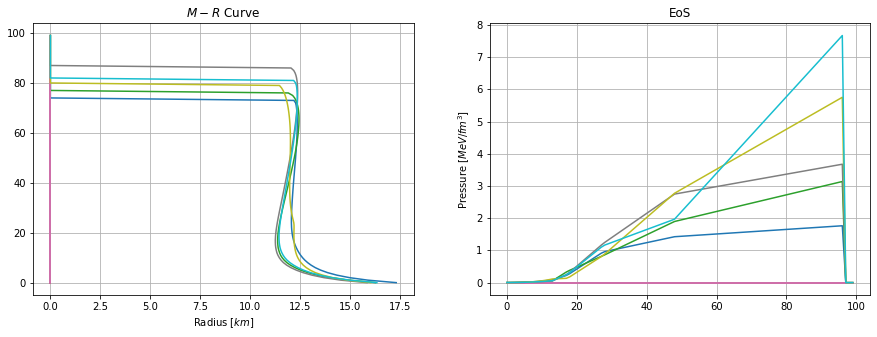

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_xlabel("Radius [$km$]")
ax[0].set_title("$M-R$ Curve")
ax[0].grid()
ax[1].set_ylabel("Pressure [$MeV / fm^3$]")
ax[1].set_title("EoS")
ax[1].grid()
z = np.arange(100)
for j in range(10):
    i = np.random.choice(r.shape[0])
    x = r[i]
    y = p[i]
    ax[0].plot(x,z)
    ax[1].plot(y)

### 4. Cut off columns

Note that the last (98-99$^{th}$) columns of $\mathbf{R}$ and $\mathbf{P}$ are zeros. We can use the data up to column 97 of these matrices.

Therefore, we cut off the data after column 97 and plot some random data for visualization.

In [5]:
rd = r[:,:97]
pr = p[:,:97]
print("dim(R) =", rd.shape[0], "x", rd.shape[1])
print("dim(P) =", pr.shape[0], "x", pr.shape[1])

dim(R) = 27632 x 97
dim(P) = 27632 x 97


Plot some random data for visualization.

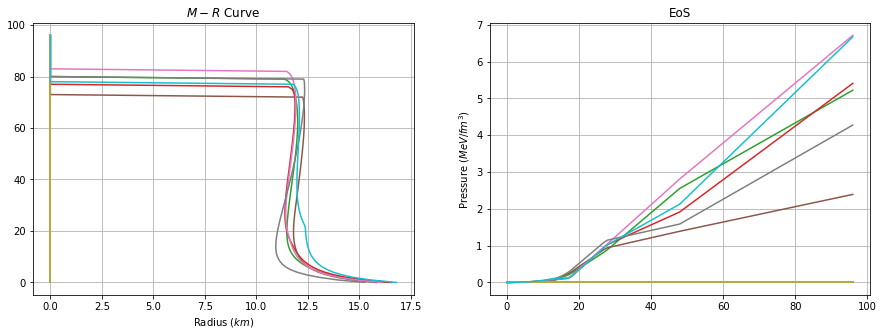

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_xlabel("Radius ($km$)")
ax[0].set_title("$M-R$ Curve")
ax[0].grid()
ax[1].set_ylabel("Pressure ($MeV / fm^3$)")
ax[1].set_title("EoS")
ax[1].grid()
z = np.arange(97)
for j in range(10):
    i = np.random.choice(rd.shape[0])
    x = rd[i]
    y = pr[i]
    ax[0].plot(x,z)
    ax[1].plot(y)

### 5. Remove zero rows

Upon randomly plotting the above data a few times, we notice that some rows in $\mathbf{R}$ and $\mathbf{P}$ are zeros. The vertical line(s) on the $M-R$ plot and the horizontal line(s) on the EoS plot suggest so. We exclude these zero rows and check the dimensions of the matrices again.

In [7]:
R, P = [], []
for i in range(rd.shape[0]):
    ri = rd[i]
    pi = pr[i]
    if (pi.all()!=0):
        P.append(pi)
        R.append(ri)
P = np.array(P)
R = np.array(R)
print("dim(R) =", R.shape[0], "x", R.shape[1])
print("dim(P) =", P.shape[0], "x", P.shape[1])

dim(R) = 14808 x 97
dim(P) = 14808 x 97


Plot the remaining data to verify if the vertical and the horizontal lines have vanished.

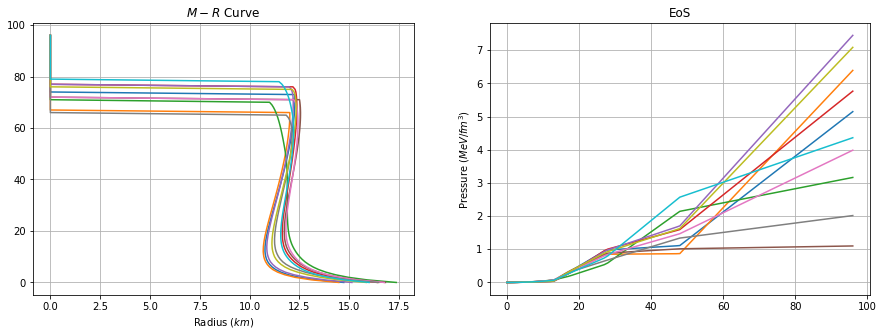

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_xlabel("Radius ($km$)")
ax[0].set_title("$M-R$ Curve")
ax[0].grid()
ax[1].set_ylabel("Pressure ($MeV / fm^3$)")
ax[1].set_title("EoS")
ax[1].grid()
z = np.arange(97)
for j in range(10):
    i = np.random.choice(R.shape[0])
    x = R[i]
    y = P[i]
    ax[0].plot(x,z)
    ax[1].plot(y)

### 6. Write the processed data to files

Finally, the data is ready to be used for training neural networks. We save the radius and the pressure matrices in two separate text files.

In [9]:
np.savetxt("m-r_4l.txt", R)
np.savetxt("eos_4l.txt", P)